In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.array([
    [2, 1, 1, 0, -1, -1, -2],
    [2, 1, 3, 2, 3, 1, 3],
])

classification = np.array(['c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2'])

In [8]:
data

array([[ 2,  1,  1,  0, -1, -1, -2],
       [ 2,  1,  3,  2,  3,  1,  3]])

In [9]:
classification

array(['c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2'], dtype='<U2')

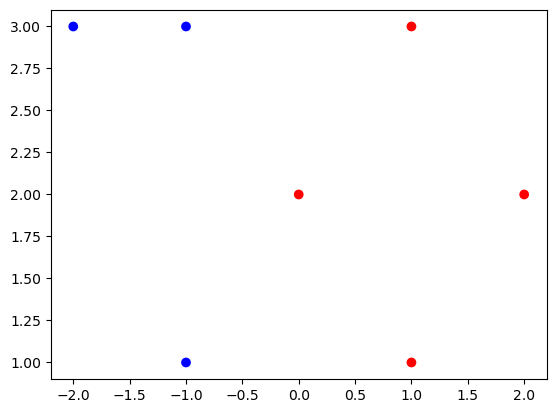

In [10]:
# plot the data, labeling c1 as red and c2 as blue. 
plt.scatter(data[0], data[1], c=['red' if cls == 'c1' else 'blue' for cls in classification])

# a) Covariance matrices

In [17]:
def calculate_mean(data, classification, class_label):
    # Extract the data points belonging to the given class_label
    class_data = data[:, classification == class_label]
    
    # Calculate the mean vector for the class
    mean_vector = np.mean(class_data, axis=1, keepdims=True)
    
    return mean_vector

In [18]:
def calculate_covariance(data, classification, class_label, mean_vector):
    # Extract the data points belonging to the given class_label
    class_data = data[:, classification == class_label]
    
    # Center the data by subtracting the mean vector
    centered_data = class_data - mean_vector
    
    # Calculate the covariance matrix for the class
    covariance_matrix = np.dot(centered_data, centered_data.T) / (class_data.shape[1] - 1)
    
    return covariance_matrix

In [19]:
mu_c1 = calculate_mean(data, classification, 'c1')
mu_c2 = calculate_mean(data, classification, 'c2')

print("Mean vector for class c1:", mu_c1)
print("Mean vector for class c2:", mu_c2)

Mean vector for class c1: [[1.]
 [2.]]
Mean vector for class c2: [[-1.33333333]
 [ 2.33333333]]


In [21]:
S1 = calculate_covariance(data, classification, 'c1', mu_c1)
S2 = calculate_covariance(data, classification, 'c2', mu_c2)

print("Covariance matrix for class c1:\n", S1)
print("Covariance matrix for class c2:\n", S2)

Covariance matrix for class c1:
 [[0.66666667 0.        ]
 [0.         0.66666667]]
Covariance matrix for class c2:
 [[ 0.33333333 -0.33333333]
 [-0.33333333  1.33333333]]


# b) $W^*$

In [25]:
S_W = S1 + S2
S_W

array([[ 1.        , -0.33333333],
       [-0.33333333,  2.        ]])

In [44]:
w_star = np.linalg.inv(S_W) @ (mu_c1 - mu_c2)
w_star

array([[2.41176471],
       [0.23529412]])

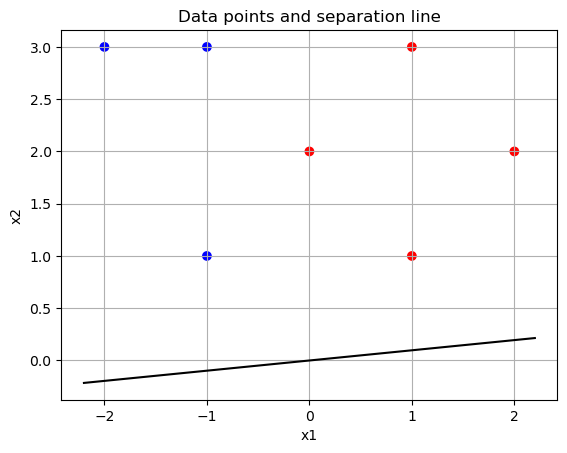

In [46]:
# Plot the data points
plt.scatter(data[0], data[1], c=['red' if cls == 'c1' else 'blue' for cls in classification])

# Calculate the slope of the line
slope = w_star[1][0] / w_star[0][0]

# Define the x range for the line
x_vals = np.array(plt.gca().get_xlim())

# Calculate the corresponding y values
y_vals = slope * x_vals

# Draw the line
plt.plot(x_vals, y_vals, color='black')

# Show the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data points and separation line')
plt.grid(True)
plt.show()